In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tqdm
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
def show_img(img):
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')

# Load & pre-process data

In [3]:
num_class = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, np.prod(input_shape)).astype('float32') / 255
x_test = x_test.reshape(-1, np.prod(input_shape)).astype('float32') / 255

# y_train = to_categorical(y_train, num_class)
# y_test = to_categorical(y_test, num_class)

In [4]:
batch = []
for i in range(10):
    batch.append( x_train[np.where(y_train == i)[0],] )

# Defines RBM

In [5]:
class RBM():
    def __init__(self, q, n):
        self.W = np.random.normal(scale=0.01, size=(n, q))
        self.a = np.zeros(n)
        self.b = np.zeros(q)
        
    def forward(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)
    
    def backward(self, H):
        return self.sigmoid(np.dot(H, self.W.T) + self.a)
    
    def train(self, X, epochs=5, lr=1e-3):
        m = len(X)
        losses = np.zeros(epochs)
        
        v_0 = X
        
        for epoch in tqdm.tqdm(range(epochs)):

            # Sample h_0
            p_h_v_0 = self.forward(v_0)
            h_0 = p_h_v_0 >= np.random.random(p_h_v_0.shape)

            # Sample v_1
            p_v_h_0 = self.backward(h_0)
            v_1 = p_v_h_0 >= np.random.random(p_v_h_0.shape)
            
            # Loss
            losses[epoch] = ((v_0 - v_1) ** 2).mean()

            p_h_v_1 = self.forward(v_1)

            # Compute deltas
            dw = np.dot(v_0.T, p_h_v_0) - np.dot(v_1.T, p_h_v_1)
            da = np.sum(v_0 - v_1, axis=0)
            db = np.sum(p_h_v_0 - p_h_v_1, axis=0)

            # Update weights
            self.W += lr * dw
            self.a += lr * da
            self.b += lr * db
            
        plt.plot(losses)
            
    def generate_image(self, n_iter_gibs=3, n_images=5):
        pass

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Params

In [6]:
q = 10
n = np.prod(input_shape)

# Code

In [7]:
rbm = RBM(q, n)

100%|██████████| 20/20 [00:21<00:00,  1.03s/it]


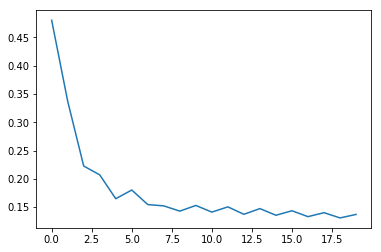

In [8]:
rbm.train(batch[6], epochs=20, lr=1e-4)

In [9]:
output = rbm.backward(rbm.forward(np.random.normal(size=(1, 784))))

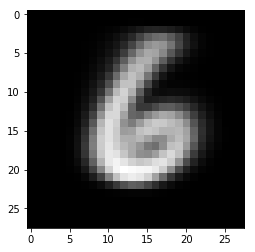

In [10]:
show_img(output)